<a href="https://colab.research.google.com/github/sreejasankuri3/sreejasankuri.github.io/blob/main/NewsMind1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install newspaper3k lxml_html_clean --no-cache-dir


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Error processing https://www.foxnews.com/politics/dirty-15-countries-trump-might-target-liberation-day-tariffs: Article `download()` failed with 403 Client Error: Forbidden 1002 for url: https://www.foxnews.com/politics/dirty-15-countries-trump-might-target-liberation-day-tariffs on URL https://www.foxnews.com/politics/dirty-15-countries-trump-might-target-liberation-day-tariffs
Error processing https://screenrant.com/top-gun-maverick-iceman-val-kilmer-best-part-op-ed/: Article `download()` failed with ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')) on URL https://screenrant.com/top-gun-maverick-iceman-val-kilmer-best-part-op-ed/


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbe


Source: https://www.healthline.com/health-news/arnold-schwarzenegger-talks-joint-and-mobility-health
Summary:  Arnold Schwarzenegger wants those with joint pain and mobility issues to know they are not alone . Schwarzenegger and medical technology company Zimmer Biomet announced the launch of “You’ll Be Back” The campaign invites people with limited mobility to share their stories for an opportunity to meet the illustrious actor and be featured in a motivational docuseries .
Sentiment: POSITIVE

Source: https://www.dailymail.co.uk/news/article-14562679/moment-python-grandmother-swallowed-indonesia.html?ns_mchannel=rss&ns_campaign=1490&ito=1490
Summary:  Family of a missing woman tracked snake down to a patch of dense vegetation in South Sulawesi, Indonesia . Found the body of 66-year-old Hasia, who had vanished while walking home from her job at a rubber plantation . The snake is believed to have pounced from the tall grass and clamped down on her leg, causing her to fall .
Sentiment:

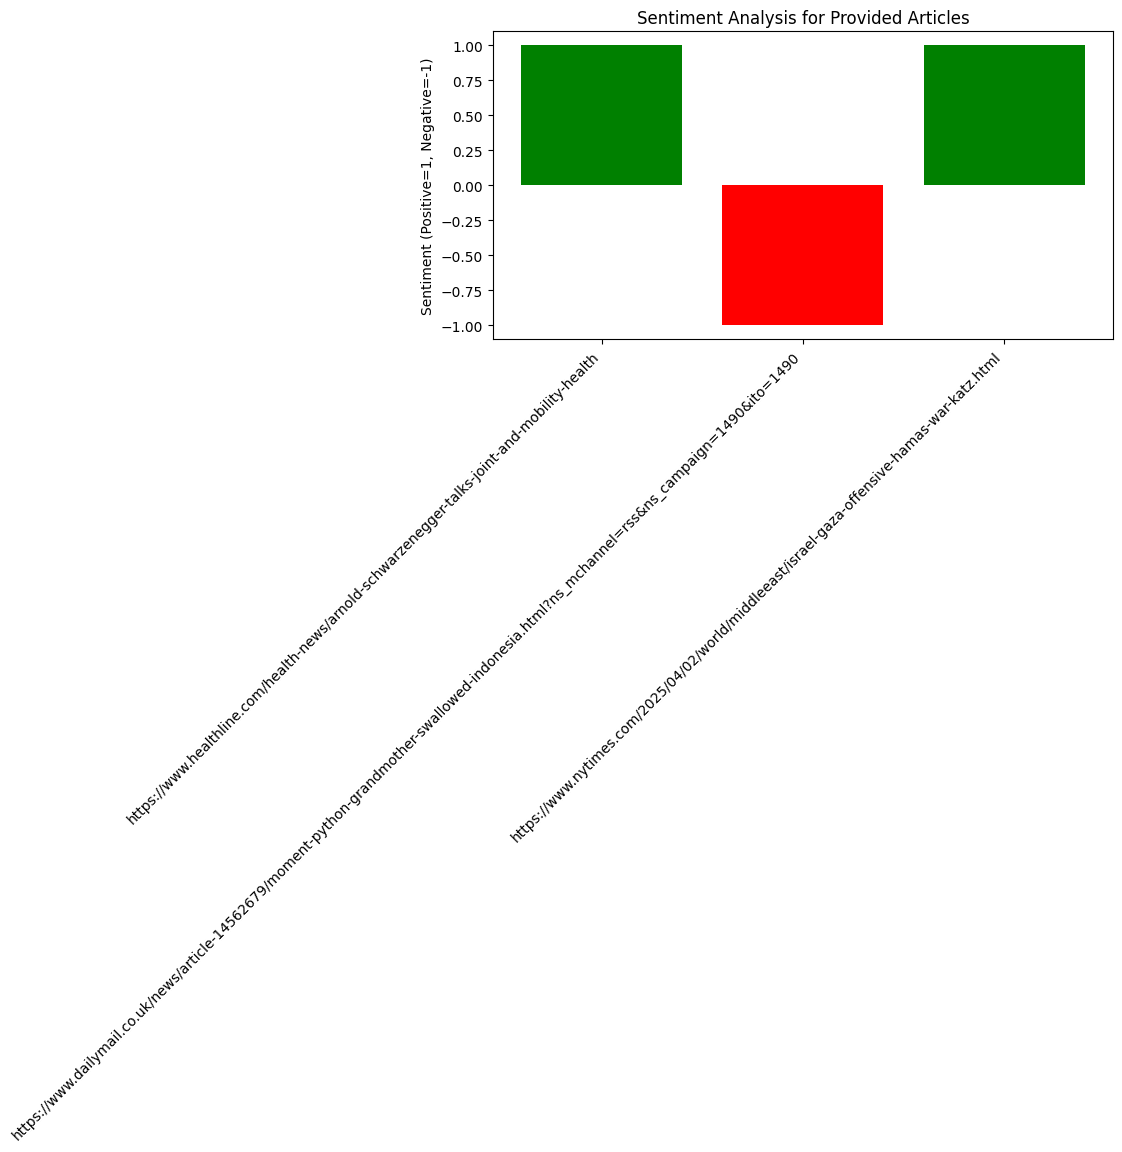

In [70]:
# Main function to process the articles
def main(articles):
    summaries = []
    sentiments = []
    valid_sources = []  # This list will store only valid sources (those successfully processed)

    # Loop through provided article URLs
    for url in articles:
        try:
            article_text = get_article_text(url)
            summary = summarize_text(article_text)
            sentiment = analyze_sentiment(summary)
            summaries.append(summary)
            sentiments.append(sentiment['label'])
            valid_sources.append(url)  # Add valid URL to valid_sources list
        except Exception as e:
            print(f"Error processing {url}: {e}")

    # Check if summaries and sentiments have matching lengths
    if len(summaries) != len(sentiments):
        print("Error: The number of summaries and sentiments do not match.")
        return

    # Print summaries and sentiments
    for i in range(len(summaries)):
        print(f"\nSource: {valid_sources[i]}\nSummary: {summaries[i]}\nSentiment: {sentiments[i]}")

    # Plot sentiment comparison
    plt.figure(figsize=(8, 4))  # Set figure size
    plt.bar(valid_sources, [1 if s == 'POSITIVE' else -1 for s in sentiments],
            color=['green' if s == 'POSITIVE' else 'red' for s in sentiments])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Sentiment Analysis for Provided Articles')
    plt.ylabel("Sentiment (Positive=1, Negative=-1)")
    plt.show()

# List of your 5 articles
articles = [
    "https://www.healthline.com/health-news/arnold-schwarzenegger-talks-joint-and-mobility-health",
    "https://www.foxnews.com/politics/dirty-15-countries-trump-might-target-liberation-day-tariffs",
    "https://screenrant.com/top-gun-maverick-iceman-val-kilmer-best-part-op-ed/",
    "https://www.dailymail.co.uk/news/article-14562679/moment-python-grandmother-swallowed-indonesia.html?ns_mchannel=rss&ns_campaign=1490&ito=1490",
    "https://www.nytimes.com/2025/04/02/world/middleeast/israel-gaza-offensive-hamas-war-katz.html"
]

# Run the program with the provided articles
if __name__ == "__main__":
    main(articles)
